In [1]:

%tensorflow_version 2.x
import numpy as np
import h5py as h5 
import tensorflow as tf

TensorFlow 2.x selected.


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
inputFile = h5.File('/content/drive/My Drive/Deep Learning/SVHN_single_grey1.h5', 'r') # opening that file and storing it in a f1 

In [0]:
keyList = list (inputFile.keys()) # Taking all the keys into list.

In [6]:
print ('folder(s) in hdf5 file are : \n',keyList) # seeing the folders in file

folder(s) in hdf5 file are : 
 ['X_test', 'X_train', 'X_val', 'y_test', 'y_train', 'y_val']


In [8]:
#Printing  the shape of the folder present in SVHN_single_grey1.h5 file 
for index, value in enumerate(keyList):
    value = np.array (inputFile.get(value))
    
    print('shape of {}'.format(index) , value.shape)

shape of 0 (18000, 32, 32)
shape of 1 (42000, 32, 32)
shape of 2 (60000, 32, 32)
shape of 3 (18000,)
shape of 4 (42000,)
shape of 5 (60000,)


In [0]:
# Converting all folder containing  feature variables into np.array  in hdf5 file
X_test = np.array(inputFile.get('X_test'))
X_train = np.array(inputFile.get('X_train'))
X_val = np.array(inputFile.get('X_val'))

In [10]:
print ('Shape of training image:',X_train[0].shape )
print ('Shape of test image :',X_test[0].shape )
print ('Shape of validation image :',X_val[0].shape )

Shape of training image: (32, 32)
Shape of test image : (32, 32)
Shape of validation image : (32, 32)


In [0]:
# Converting all folders that  cantains target variable into np.array  in hdf5 file
y_test = np.array(inputFile.get('y_test'))
y_train = np.array(inputFile.get('y_train'))
y_val = np.array(inputFile.get('y_val'))

In [0]:
h5.File.close(f1) # closeing the hdf5 file 

In [14]:
print ('Datatype of X_test',type(X_test))
print ('Datatype of X_train',type(X_train))
print ('Datatype of X_val',type(X_val))

Datatype of X_test <class 'numpy.ndarray'>
Datatype of X_train <class 'numpy.ndarray'>
Datatype of X_val <class 'numpy.ndarray'>


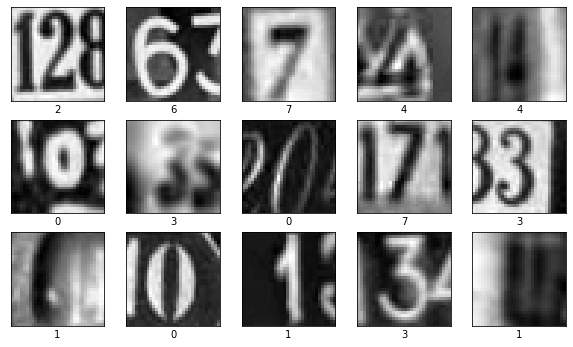

In [16]:
#Plotting first 15 images in the training  set and their labels
import matplotlib.pyplot as plt
# to Print plots in jupyter notebook 
%matplotlib inline 
plt.figure(figsize=(10,10)) # figure size 
for i in range(15): # looping for first 15 element of training set
    plt.subplot(5,5,i+1) # creating sub plot for  ploting figure 
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(X_train[i], cmap=plt.cm.binary) # Ploting binary figures 
    plt.xlabel(y_train[i]) # giving Lables to plot images 
plt.show()
# Our goal is to identify the image with centered digit
# Plotting Images with labels

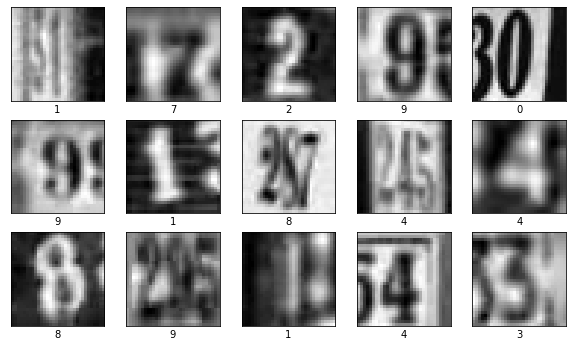

In [17]:
#Plotting first 15 images in the test set and their labels
import matplotlib.pyplot as plt
# to Print plots in jupyter notebook 
%matplotlib inline 
plt.figure(figsize=(10,10)) # figure size 
for i in range(15): # looping for first 15 element of training set
    plt.subplot(5,5,i+1) # creating sub plot for  ploting figure 
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(X_test[i], cmap=plt.cm.binary) # Ploting binary figures 
    plt.xlabel(y_test[i]) # giving Lables to plot images 
plt.show()

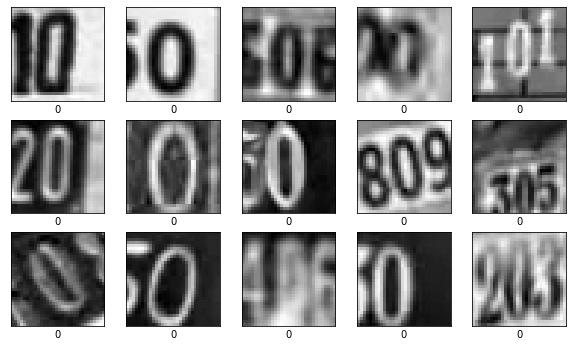

In [18]:
#Plot first 15 images in the validation set and their labels
import matplotlib.pyplot as plt
# to Print plots in jupyter notebook 
%matplotlib inline 
plt.figure(figsize=(10,10)) # figure size 
for i in range(15): # looping for first 10 element of training set
    plt.subplot(5,5,i+1) # creating sub plot for  ploting figure 
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(X_val[i], cmap=plt.cm.binary) # Ploting binary  figures 
    plt.xlabel(y_val[i]) # giving Lables to plot images 
plt.show()

In [0]:
# Noramlizing  the data 
X_train_reshaped = X_train/255
X_test_reshaped = X_test/255
X_val_reshaped = X_val/255


In [0]:
testy = tf.keras.utils.to_categorical(y_test)
trainy = tf.keras.utils.to_categorical(y_train)
valy = tf.keras.utils.to_categorical(y_val)

In [0]:
# Importing necessary libraries

from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import MaxPool2D
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Reshape
from tensorflow.keras.backend import clear_session
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.metrics import Accuracy


In [0]:
# we will use dense layer neural netwrok as Image size is 32*32
# Clearing  the session 
clear_session()
#Initialize model, reshape & normalize data
model = Sequential() 

# #Reshape data
model.add(Reshape((1024,),input_shape=(32,32,)))

#normalize data
model.add(BatchNormalization())

#Add first dense layer
model.add(Dense(256,activation='relu'))

#Add second dense layer
model.add(Dense(128,activation='relu'))

#normalize data
model.add(BatchNormalization())

#Add third dense layer
model.add(Dense(16,activation='relu'))

#normalize data
model.add(BatchNormalization())

#Output layer
model.add(Dense(10, activation='softmax'))

# Create optimizer with non-default learning rate
sgd_optimizer = SGD(lr=0.03)

# Compile the model
model.compile('sgd', loss='categorical_crossentropy', metrics=['accuracy'])

In [24]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
reshape (Reshape)            (None, 1024)              0         
_________________________________________________________________
batch_normalization (BatchNo (None, 1024)              4096      
_________________________________________________________________
dense (Dense)                (None, 256)               262400    
_________________________________________________________________
dense_1 (Dense)              (None, 128)               32896     
_________________________________________________________________
batch_normalization_1 (Batch (None, 128)               512       
_________________________________________________________________
dense_2 (Dense)              (None, 16)                2064      
_________________________________________________________________
batch_normalization_2 (Batch (None, 16)                6

In [0]:
#Initialize model, reshape & normalize data
model2 = Sequential()

#Reshape data from 2D (32,32) to 3D (32, 32, 1)
model2.add(Reshape((32,32,1),input_shape=(32,32,)))

#normalize data
model2.add(BatchNormalization())

#Add first convolutional layer
model2.add(Conv2D(32,   kernel_size=(5,5),  activation='relu'))

#Add second convolutional layer
model2.add(Conv2D(32, kernel_size=(5,5), activation='relu'))



#Flattenning the output
model2.add(Flatten())

#Adding Dense layer
model2.add(Dense(128, activation='relu'))

#Output layer
model2.add(Dense(10, activation='softmax'))

In [0]:
model2.compile(optimizer='adam', 
              loss='categorical_crossentropy', metrics=['accuracy'])


In [27]:
model2.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
reshape_1 (Reshape)          (None, 32, 32, 1)         0         
_________________________________________________________________
batch_normalization_3 (Batch (None, 32, 32, 1)         4         
_________________________________________________________________
conv2d (Conv2D)              (None, 28, 28, 32)        832       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 24, 24, 32)        25632     
_________________________________________________________________
flatten (Flatten)            (None, 18432)             0         
_________________________________________________________________
dense_4 (Dense)              (None, 128)               2359424   
_________________________________________________________________
dense_5 (Dense)              (None, 10)               

In [28]:
  #Training  the model
history = model.fit(X_train_reshaped,trainy,          
          validation_data=(X_val_reshaped,valy),
          epochs=10,
          batch_size=32)

Train on 42000 samples, validate on 60000 samples
Epoch 1/10
42000/42000 [==============================] - 13s 317us/sample - loss: 1.8296 - accuracy: 0.3860 - val_loss: 1.2935 - val_accuracy: 0.6129
Epoch 2/10
42000/42000 [==============================] - 11s 269us/sample - loss: 1.2632 - accuracy: 0.6023 - val_loss: 0.9953 - val_accuracy: 0.6907
Epoch 3/10
42000/42000 [==============================] - 11s 272us/sample - loss: 1.0609 - accuracy: 0.6699 - val_loss: 0.8596 - val_accuracy: 0.7406
Epoch 4/10
42000/42000 [==============================] - 11s 271us/sample - loss: 0.9540 - accuracy: 0.6997 - val_loss: 0.7745 - val_accuracy: 0.7642
Epoch 5/10
42000/42000 [==============================] - 11s 266us/sample - loss: 0.8831 - accuracy: 0.7234 - val_loss: 0.7108 - val_accuracy: 0.7790
Epoch 6/10
42000/42000 [==============================] - 11s 272us/sample - loss: 0.8305 - accuracy: 0.7393 - val_loss: 0.6285 - val_accuracy: 0.8116
Epoch 7/10
42000/42000 [====================

In [29]:
#Training  the model2
result2 = model2.fit(X_train_reshaped,trainy,          
          validation_data=(X_val_reshaped,valy),
          epochs=10,
          batch_size=32)

Train on 42000 samples, validate on 60000 samples
Epoch 1/10
42000/42000 [==============================] - 233s 6ms/sample - loss: 0.6659 - accuracy: 0.7967 - val_loss: 0.3985 - val_accuracy: 0.8817
Epoch 2/10
42000/42000 [==============================] - 233s 6ms/sample - loss: 0.3699 - accuracy: 0.8876 - val_loss: 0.3099 - val_accuracy: 0.9089
Epoch 3/10
42000/42000 [==============================] - 232s 6ms/sample - loss: 0.2740 - accuracy: 0.9164 - val_loss: 0.2473 - val_accuracy: 0.9276
Epoch 4/10
42000/42000 [==============================] - 232s 6ms/sample - loss: 0.2112 - accuracy: 0.9350 - val_loss: 0.2229 - val_accuracy: 0.9378
Epoch 5/10
42000/42000 [==============================] - 231s 5ms/sample - loss: 0.1570 - accuracy: 0.9508 - val_loss: 0.2157 - val_accuracy: 0.9429
Epoch 6/10
42000/42000 [==============================] - 231s 6ms/sample - loss: 0.1255 - accuracy: 0.9607 - val_loss: 0.2117 - val_accuracy: 0.9489
Epoch 7/10
42000/42000 [==========================

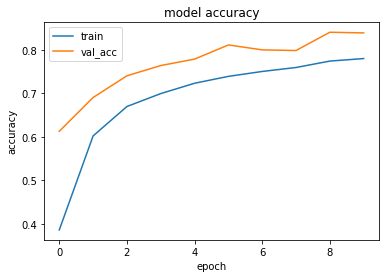

In [30]:
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val_acc'], loc='upper left')
plt.show()


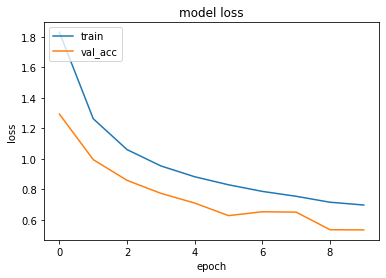

In [31]:
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val_acc'], loc='upper left')
plt.show()

In [0]:
# Predicting our Both Models on Test data 
y_pred = model.predict(X_test_reshaped)
y_pred2 = model2.predict(X_test_reshaped)

In [33]:
# printing the confusion matrix 
from sklearn.metrics import classification_report,confusion_matrix
test1 = tf.cast(X_test_reshaped, tf.float32)
print(confusion_matrix(model.predict_classes(test1), y_test))
print ('\n Model2 Confusion Matrix \n ')
print(confusion_matrix(model2.predict_classes(test1), y_test))

[[1560   43   23   23   23   19   63   22   47   86]
 [  28 1518   29   35   47   23   16   59   30   42]
 [  14   23 1486   48   35   20   18   34   19   24]
 [  27   64   70 1290   25  104   29   48   71   63]
 [  27   49   29   21 1551   15   47   13   36   23]
 [  16   11   14  130   19 1410   76   14   55   47]
 [  56   23    8   31   39   93 1490   16  111   25]
 [  16   55   78   49    9   17    7 1558   13   23]
 [  27   29   19   59   25   41   70   13 1379   58]
 [  43   13   47   33   39   26   16   31   51 1413]]

 Model2 Confusion Matrix 
 
[[1664   19    8    5    7    4   35   11   22   47]
 [  39 1598   24   24   44    9   17   42   19   12]
 [   9   15 1630   24   28   13   12   25   19   40]
 [  14   27   28 1437   15   58   10   15   32   25]
 [  10   46   16   11 1604   10   22   10   11   12]
 [   3    9    4   85   12 1549   33    6   17   24]
 [  18   14    7   36   21   75 1640   14   88   14]
 [  19   69   37   26   26   11    9 1667   14   16]
 [  12   18   16

In [35]:
# printing Classification report for model
print("Please find the classification report for Model1 as following: \n")
print(classification_report(model.predict_classes(test1),y_test))

Please find the classification report for Model1 as following: 

              precision    recall  f1-score   support

           0       0.86      0.82      0.84      1909
           1       0.83      0.83      0.83      1827
           2       0.82      0.86      0.84      1721
           3       0.75      0.72      0.74      1791
           4       0.86      0.86      0.86      1811
           5       0.80      0.79      0.79      1792
           6       0.81      0.79      0.80      1892
           7       0.86      0.85      0.86      1825
           8       0.76      0.80      0.78      1720
           9       0.78      0.83      0.80      1712

    accuracy                           0.81     18000
   macro avg       0.81      0.81      0.81     18000
weighted avg       0.81      0.81      0.81     18000



In [36]:
# printing Classification report for model2
print("Please find the classification report for Model2 as following: \n")
print(classification_report(model2.predict_classes(test1),y_test))

Please find the classification report for Model2 as following: 

              precision    recall  f1-score   support

           0       0.92      0.91      0.92      1822
           1       0.87      0.87      0.87      1828
           2       0.90      0.90      0.90      1815
           3       0.84      0.87      0.85      1661
           4       0.89      0.92      0.90      1752
           5       0.88      0.89      0.88      1742
           6       0.90      0.85      0.87      1927
           7       0.92      0.88      0.90      1894
           8       0.86      0.87      0.87      1795
           9       0.86      0.88      0.87      1764

    accuracy                           0.88     18000
   macro avg       0.88      0.88      0.88     18000
weighted avg       0.88      0.88      0.88     18000

